In [1]:
import pandas as pd
from pathlib import Path

In [9]:
df = pd.read_csv(Path('Resources/crypto_data.csv'), index_col=0)
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [10]:
# Remove not traded

df=df[df.IsTrading != 0]

In [11]:
# Rove IsTrading

df = df.drop(columns='IsTrading')

In [12]:
# Columns with NaN

for column in df.columns: 
    print(f"Column {column}: {df[column].isnull().sum()} null values.")

Column CoinName: 0 null values.
Column Algorithm: 0 null values.
Column ProofType: 0 null values.
Column TotalCoinsMined: 459 null values.
Column TotalCoinSupply: 0 null values.


In [13]:
# Drop NaN rows

df = df.dropna()

for column in df.columns: 
    print(f"Column {column}: {df[column].isnull().sum()} null values.")

Column CoinName: 0 null values.
Column Algorithm: 0 null values.
Column ProofType: 0 null values.
Column TotalCoinsMined: 0 null values.
Column TotalCoinSupply: 0 null values.


In [17]:
# Minded cryptocurrencies 

df=df[~(df.TotalCoinsMined <= 0)]

# Remove CoinName

new_df = df.drop(columns='CoinName')
new_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [20]:
# Convert to numeric
dummies = pd.get_dummies(new_df, columns=['Algorithm', 'ProofType'])
dummies.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Standardize dataset

from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_scaled = StandardScaler().fit_transform(dummies)
X_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [27]:
# PCA - preserve 90% of data (n_components = .90)

from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)

X_pca=pca.fit_transform(X_scaled)

X_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
         2.90961978e-16,  3.56816006e-15, -3.79522227e-15],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
         6.63461107e-16,  3.64207065e-15, -3.54524975e-15],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
         2.33944112e-15, -4.00107917e-14,  8.27366876e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
        -7.57014785e-15, -3.05064414e-14,  3.03994457e-14],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
        -1.00614492e-15,  4.35656105e-15,  5.08980461e-16],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         3.80522073e-15,  1.78387783e-15, -3.67931161e-15]])

In [32]:
# Reduce the dataset dimensions with t-SNE

from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=35)    

tsne_features = tsne.fit_transform(X_scaled)

tsne_features

array([[ -3.642731  ,  17.613157  ],
       [ -3.8393338 ,   9.805927  ],
       [  2.5300987 ,  22.621025  ],
       ...,
       [  3.5961509 , -22.343594  ],
       [ 10.343775  , -17.374775  ],
       [ 12.39438   ,   0.20334978]], dtype=float32)

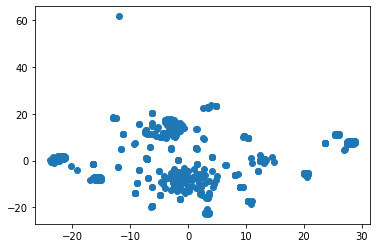

In [37]:
# Plot for clusters

X = tsne_features[:,0]
y = tsne_features[:,1]

plt.scatter(X,y)
plt.show()